# Veri Tabanı

In [10]:
import mysql.connector
mydb=mysql.connector.connect(host='localhost',user='root',password='ShnBlkbs00', database='Twitter')
mycursor = mydb.cursor()
sql = "Insert Into Tweetler(Tweet) values(%s)"     
array =["1","2"]
try:
    for x in array: 
        mycursor.execute(sql, (x,))
        mydb.commit()
    print(len(array), " adet veri eklendi.")
except mysql.connector.Error as err:
    print("Error :",err)
finally:
    print("Database kapatıldı...")
    mydb.close()     

2  adet veri eklendi.
Database kapatıldı...


# Twitterdan Tweet Çekme

In [61]:
import tweepy, codecs 
import pandas as pd

consumer_key ='SPi1R25BOz2HIZmQdpDAu8l3x'
consumer_secret ='IeQ2X0wyV5uDWsxcHyx2hvkTY9hcXMYBDPyr4alevLszzZE6fZ'
access_token ='1019708295043534850-ZNzdZQxFJFXvrrhiiRfFAihXv8rDRz'
access_token_secret ='kmYYP876OjA9MoBGO8J04oY4iXuNc38lutFAU0OKGy8dn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tweetler = api.search(q = "pazartesi", lang = "tr", result_type = "recent", count = 100)

def hashtag_df(tweetler):
    
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
      
    return df

In [62]:
def textMining(df):
    #buyuk-kucuk donusumu
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

    #noktalama işaretleri
    df['text'] = df['text'].str.replace('[^\w\s]','')

    #sayılar
    df['text'] = df['text'].str.replace('\d','')

    #stopwords
    import nltk
    #nltk.download('stopwords')
    from nltk.corpus import stopwords
    sw = stopwords.words('turkish')
    df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

    #lemmi
    from textblob import Word
    #nltk.download('wordnet')
    df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

    #noktalama işaretleri
    df['text'] = df['text'].str.replace('rt','') 
    
    # İd satırını siler
   # df = df.drop('id', 1)
    
    return df

In [63]:
df = hashtag_df(tweetler)

In [14]:
df=textMining(df)

In [64]:
df.head()

,id,text
0,1250901161047097347,RT @020Murat: 👉 #020Murat 👈🌼💗 Pazartesi 👈GÜNÜN...
1,1250901118491791360,RT @020Murat: 👉 #020Murat 👈🌼💗 Pazartesi 👈GÜNÜN...
2,1250901114872086528,RT @yorgunozer: Koca koca yangınlara kafa tuta...
3,1250901102742077440,RT @020Murat: 👉 #020Murat 👈🌼💗 Pazartesi 👈GÜNÜN...
4,1250901068294340608,@ZiraatDestek Kullandirimda sorun var tamamlay...


In [62]:
df = df.drop('sentiment', 1)

In [9]:
df.to_csv("data.csv")

# Ülke gündemindeki konular

In [22]:
turkiye = api.trends_place(id = 23424969)
trendler = turkiye[0]["trends"]
for i in trendler:
    print(i["name"])

#EkremeZırnıkYok
#okullaraçılınca
#instagrammusic
#Dangal
#GSBKitapKart
AlgılarSussun CemalKonuşsun
Dolar 6.90
Üni 1
iPhone SE
Şehidimize Allah'tan
SosyalMesafeyiKoruyun
ArtıkBitmesin Hayatlar
Elif Eylül
RTÜK'ten FOX TV'ye
Uyuyordu
SGK Denetmen Yardımcılığı
Emniyet Genel Müdürlüğü
Antibakteriyel
Vefatının 31
Barbaros Şansal
Transparan
#survivor2020karakter
#GamzePala
#Persembe
#MustafaVeİbrahimiYaşatalım
#kredimiver
#vaka69392
#ŞehirÜniversitesineDokunma
#tarafsızbölge
#komsuneczacı
#sehirhepimizin
#BOREL
#sıradanevar
#HemenŞimdiSerbestBırakın
#BabaHakkı
#tezkeremehmetciğinhakkı
#23NisandaİstiklalMarşı
#spotify
#YönetemiyorsunİBB
#SOSYOLOGLAR4BCETVELİNE
#FatihTerim
#bakbizenasilbakiyorsun
#baris
#HakkıYeten
#biyologlargünü
#MeclisTatilEytMağdur
#16nisanbiyologlargünü
#mandal1yaşında
#geceraporu
#zelihaerdemirikoru


# Atılan tweetin nereden atıldığı bulunur

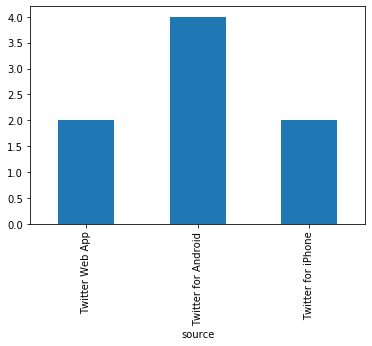

In [17]:
import matplotlib.pyplot as plt
kaynak = df.groupby("source").count()["id"]
kaynak.plot.bar(x = "source", y = "id")

In [12]:
df.groupby("source").count()["id"]

source
Twitter Web App        2
Twitter for Android    6
Twitter for iPhone     2
Name: id, dtype: int64

# WordCloud

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
text = " ".join(i for i in df.text)

               kelimeler  frekanslar
11                              59.0
6                pazaesi        33.0
25                   bir        23.0
210              atatürk        11.0
170               sağlık        10.0
176              sistemi         8.0
180              erdogan         7.0
179                   şa         7.0
178        suayipbirinci         7.0
177        beratalbayrak         7.0
175      drfahrettinkoca         7.0
174                güçlü         7.0
173                atama         7.0
172           naci_agbal         7.0
171           moonlightt         7.0
103                  can         7.0
101                ebatv         7.0
136          koronavirüs         6.0
98                ataklı         6.0
251  sorumlulukhepimizin         6.0
205                  çin         5.0
317                 olan         5.0


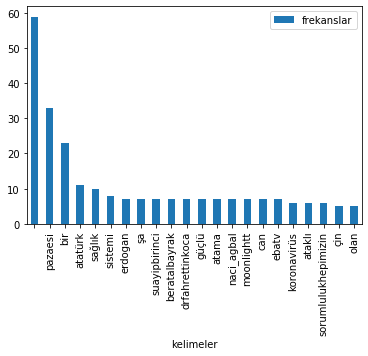

In [37]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
freq_df.columns = ["kelimeler","frekanslar"]

x=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
siralama=x.sort_values(by='frekanslar',ascending=False)
print(siralama)

a=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
siralamaBar=a.sort_values(by='frekanslar',ascending=False)
siralamaBar.plot.bar(x = "kelimeler",y = "frekanslar");


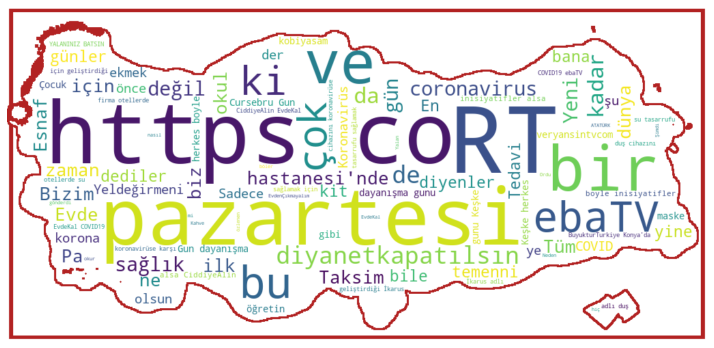

In [36]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
vbo_mask = np.array(Image.open("trr.png"))

wc = WordCloud(background_color = "white", 
               max_words = 1000, 
               mask = vbo_mask,
              contour_width = 3, 
              contour_color = "firebrick")

wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 1)
plt.show()
#wordcloud.to_file("sd.png") #Resmi Kaydeder

# TextBlob İle Sentiment Analizi

In [60]:
pip install -U textblob

Requirement already up-to-date: textblob in /opt/anaconda3/lib/python3.7/site-packages (0.15.3)
Note: you may need to restart the kernel to use updated packages.


In [52]:
df

,text
0,agrasifbey yaşlılık halimi buldum kesin benim ...
1,mnelhuseyni nefsimi yendiğim yerdir secdem rab...
2,musti pazaesi dedelerin sokakta degil önceden ...
3,tutukluhastalar tubanur ayçiçekmanisa aydır tu...
4,woman__ bir yüreğindeki güneşin doğmasına enge...
...,...
81,moonlightt güçlü bir sağlık sistemi atama şa e...
82,bitik_ruh devlet dönemde vatandaşına sahip çık...
83,sizleri seviyoruz bizlere bunu yaptırmayın paz...
84,ozturk dünya koronavirüs e önlem almaya çalışı...


In [38]:
from textblob import TextBlob

In [53]:
def sentiment_skorla(df):

    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.set_value(i, 'sentiment_skoru', sentiment_skoru)
        
        if sentiment_skoru <0.00:
            duygu_sinifi = 'Negatif'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )

        elif sentiment_skoru >0.00:
            duygu_sinifi = 'Pozitif'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )

        else:
            duygu_sinifi = 'Notr'
            df.set_value(i, 'duygu_sinifi', duygu_sinifi )
            
    return df 

In [55]:
asa=sentiment_skorla(df)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [56]:
asa.head()

,text,sentiment_skoru,duygu_sinifi
0,agrasifbey yaşlılık halimi buldum kesin benim ...,0.0,Notr
1,mnelhuseyni nefsimi yendiğim yerdir secdem rab...,0.0,Notr
2,musti pazaesi dedelerin sokakta degil önceden ...,0.0,Notr
3,tutukluhastalar tubanur ayçiçekmanisa aydır tu...,0.0,Notr
4,woman__ bir yüreğindeki güneşin doğmasına enge...,0.0,Notr


In [66]:
x = (df.groupby("duygu_sinifi").count()["text"])

In [67]:
print(x)

duygu_sinifi
Notr    100
Name: text, dtype: int64


# Sentiment Analizi

In [65]:
# https://github.com/llSourcell?tab=repositories&q=senti&type=&language=
# https://www.nltk.org/howto/sentiment.html
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

In [66]:
consumer_key ='SPi1R25BOz2HIZmQdpDAu8l3x'
consumer_secret ='IeQ2X0wyV5uDWsxcHyx2hvkTY9hcXMYBDPyr4alevLszzZE6fZ'
access_token ='1019708295043534850-ZNzdZQxFJFXvrrhiiRfFAihXv8rDRz'
access_token_secret ='kmYYP876OjA9MoBGO8J04oY4iXuNc38lutFAU0OKGy8dn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
tweets = api.search('okullaraçılınca',lang = "tr", count=100)
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['text'])

display(data.head())
print(tweets[0].created_at)


,text
0,RT @ferhatkina: #okullaraçılınca Gidilmedik kö...
1,RT @ziyaselcuk: Hayaller gerçeklerin provasıdı...
2,RT @huseyinnogut: #okullaraçılınca bir hayalim...
3,"RT @Sehriban55__: ▪Üniversitelerde, ilk ve ort..."
4,#okullaracilinca bıktım bu okuldan \nSabah 7 d...


2020-04-16 23:19:56


In [67]:
df=textMining(df)
df=data.head()

In [68]:
sid = SentimentIntensityAnalyzer()

listy = []

for index, row in df.iterrows():
  ss = sid.polarity_scores(row["text"])
  listy.append(ss)
  
se = pd.Series(listy)
df['polarity'] = se.values

display(df.head(100))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,text,polarity
0,RT @ferhatkina: #okullaraçılınca Gidilmedik kö...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,RT @ziyaselcuk: Hayaller gerçeklerin provasıdı...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,RT @huseyinnogut: #okullaraçılınca bir hayalim...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"RT @Sehriban55__: ▪Üniversitelerde, ilk ve ort...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,#okullaracilinca bıktım bu okuldan \nSabah 7 d...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [75]:
for tweet in df["text"] : #Sadece ingilizce olarak kullanılır
    print(tweet)
    print(TextBlob(tweet).sentiment)

RT @ferhatkina: #okullaraçılınca Gidilmedik köy okulu bırakmayacağız 🥇🎭
@tiyatro_m https://t.co/475uajtv8W
Sentiment(polarity=0.0, subjectivity=0.0)
RT @ziyaselcuk: Hayaller gerçeklerin provasıdır. Hayal kurmasak gerçeği bu kadar güzel olmaz mutlu anların. Öğretmenlerimize, velilerimize,…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @huseyinnogut: #okullaraçılınca bir hayalimi yazmak isterdim ama @piktesogretmen'iyim. Kadrom yok, yarınım yok, güvencem yok. İşim ne ol…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @Sehriban55__: ▪Üniversitelerde, ilk ve orta öğretimde yaz tatilinde eğitim verilecek. 

▪Öğretmenlerin 2 aylık yaz tatili kısaltılabile…
Sentiment(polarity=0.0, subjectivity=0.0)
#okullaracilinca bıktım bu okuldan 
Sabah 7 de kalkıyorum 
Otobüs neden gelmiyor vs 
Sözlerini bir süre kullanmayac… https://t.co/5FdzSP9CdR
Sentiment(polarity=0.0, subjectivity=0.0)


In [69]:
pip install tflearn

Note: you may need to restart the kernel to use updated packages.


In [74]:

from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# IMDB Dataset loading
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000, valid_portion=0.1)
trainX, trainY = train
testX, testY = test

# Data preprocessing
# Sequence padding
trainX = pad_sequences(trainX, maxlen=100, value=0.)
testX = pad_sequences(testX, maxlen=100, value=0.)
# Converting labels to binary vectors
trainY = to_categorical(trainY, nb_classes=2)
testY = to_categorical(testY, nb_classes=2)

# Network building
net = tflearn.input_data([None, 100])
net = tflearn.embedding(net, input_dim=10000, output_dim=128)
net = tflearn.lstm(net, 128, dropout=0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,loss='categorical_crossentropy')

# Training
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=(testX, testY), show_metric=True,batch_size=32)

NameError: name 'load_data' is not defined

# -------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import os 
import tweepy

In [2]:
consumer_key ='SPi1R25BOz2HIZmQdpDAu8l3x'
consumer_secret ='IeQ2X0wyV5uDWsxcHyx2hvkTY9hcXMYBDPyr4alevLszzZE6fZ'
access_token ='1019708295043534850-ZNzdZQxFJFXvrrhiiRfFAihXv8rDRz'
access_token_secret ='kmYYP876OjA9MoBGO8J04oY4iXuNc38lutFAU0OKGy8dn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [95]:
df=pd.read_csv("/Users/sahinbolukbasi/data.csv")

In [100]:
df['text']

0      nure_ak sondakika evden bir oy pkk lıları mec...
1      nure_ak sondakika evden bir oy pkk lıları mec...
2      yasaurann koronavirüsten hayatını kaybedenler...
3      azizergin adalet bakanı abdulhamitgul cezaevl...
4      evrimagaci covid koronavirüs salgını insan ya...
                            ...                        
94     oadunyacom ev karantinasında gün evdençıkmaya...
95     acrarz sahiden anlayabildik mi onları pazaesi...
96     bizburadayizzz ameliyati var kanlar tamamlana...
97     havarhayook pazaesi ebatv evdekaltuerkiye sağ...
98     ogundd türkiye ekonomisini ayağa kaldıran say...
Name: text, Length: 99, dtype: object

In [106]:
for x in df['text']:
    print(x+' \n')

 nure_ak sondakika evden bir oy pkk lıları meclise sokan chp nin metresi olan hdp yönetimindeki batman belediyesi diya 

 nure_ak sondakika evden bir oy pkk lıları meclise sokan chp nin metresi olan hdp yönetimindeki batman belediyesi diya 

 yasaurann koronavirüsten hayatını kaybedenlere allahtan rahmet hastalığı devam edenlere acil şifalar diliyorum rabbim devlet 

 azizergin adalet bakanı abdulhamitgul cezaevlerinde pozitif bir koronavirüs vakasına rastlanmamıştır cezaevlerine gerekli t 

 evrimagaci covid koronavirüs salgını insan yapımı değil doğal yollarla evrimleşti sahtebilimcilerin iddialarının aksine 

 evrimagaci covid koronavirüs salgını insan yapımı değil doğal yollarla evrimleşti sahtebilimcilerin iddialarının aksine 

 aslandegirmenci düşmeyen ateş öksürük nefes darlığınız varsa maske takarak bir sağlık kuruluşuna başvurun enabizsistemi 

 drserkanozkul ebatv edebiyat derslerini serdar tuncer yaziyor anlatsın 

 uurbcei benmi diyorum beni sorarsanız sessiz sessiz duruşum

In [97]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [5]:
def tweetKonusu(hstg,tweetAdeti):
    adet=int(tweetAdeti)
    tweetler = api.search(q = hstg, lang = "tr", result_type = "recent", count =adet )
    return tweetler

# df=pd.read_csv("/Users/sahinbolukbasi/data.csv")
# text = " ".join(i for i in df.text)



def basitHashtag():     
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['text'])
    return data.text

def detaylıHashtag():
    tweetler = api.search('pazartesi',lang = "tr", count=100)
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    #df["screen_name"] = [tweet.screen_name for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    # df["location"] = [tweet.location for tweet in tweetler]
    #df["followers_count"] = [tweet.followers_count for tweet in tweetler]
    #df["statuses_count"] = [tweet.statuses_count for tweet in tweetler]
    #df["friends_count"] = [tweet.friends_count for tweet in tweetler]
    #df["favourites_count"] = [tweet.favourites_count for tweet in tweetler]
    #df["source"] = [tweet.source for tweet in tweets]
    
    return df

def ozgunlukOranı(data):
    df[~df["text"].str.startswith("RT")].count()["id"] / len(df) #Özgünlük oranı
    
def ulkeGundem(ulkeAdi):   #Ülke kodalrını ada göre bulma
    ulkeAdi=ulkeAdi.lower()
    trends=api.trends_available()
    ulke_kimligi=ulkeKodları()
    return ulke_kimligi[ulkeAdi]

def tweetGunDAgilimi(data):
    df["gunler"] = df["created_at"].dt.weekday_name
    gun_freq = df.groupby("gunler").count()["id"]
    dagilim=gun_freq.sort_values().plot.bar()(x = "gunler", y = "id")
    return dagilim

def katnakBelirleme(data):
    kaynak_freq = df.groupby("source").count()["id"]
    kaynak_freq.plot.bar(x = "source", y = "id")
    
def dosyaOlustur(dosyaNo):
    liste=os.listdir()
    sonuc=True
    for x in liste :
        if dosyaNo != x:
            os.system("mkdir {}  {}".format(dosyaNo,os.getcwd()))
        else:
            print("Girdiğini {} nolu dosya kayıtlıdır...".format(dosyaNo))
            sonuc=False
    if(sonuc==True):
        print(" {} nolu dosya oluşturuldu...".format(dosyaNo))
        
    return dosyaNo

def gecenKelimeler(kayitAdresi,dosyaNo) :
    freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
    freq_df.columns = ["kelimeler","frekanslar"] #Verileri Sıralar
    x=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
    siralama=x.sort_values(by='frekanslar',ascending=False)
    siralama.head()#Verileri Sıralar ve kelimenin kullanım oranını verir
    siralama.to_csv(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+".csv"))
    return siralama

def analizBar(kayitAdresi,dosyaNo) :
    freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
    freq_df.columns = ["kelimeler","frekanslar"] #Verileri Sıralar
    wordProcess=freq_df[freq_df.frekanslar > freq_df.frekanslar.mean() + freq_df.frekanslar.std()]
    wordProcessBar=wordProcess.sort_values(by='frekanslar',ascending=False)
    wordProcessBar=wordProcessBar.plot.bar(x = "kelimeler",y = "frekanslar")
    wordProcessBar.figure.savefig(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_KF.png"))
    return wordProcessBar


def resimharitası(resimArkaPlan,kayitAdresi,dosyaNo,gelenVeri) :
    vbo_mask = np.array(Image.open(resimArkaPlan))#Arka plan döşemesi
    wc = WordCloud(background_color = "white", #Arka plan resmi
                max_words = 10, # Kelime sayısı
                mask = vbo_mask, #Kaydedilecek yer
                contour_width = 3, #Sınır kalınlığı
                contour_color = "firebrick") # Yazı stili
    wc.generate(gelenVeri)
    plt.figure(figsize=(10,10))#Resim boyutu
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.tight_layout(pad = 0) #Kelimelerin bir birine yakınlığı
    x=plt.show()
    wc.to_file(kayitAdresi+"/"+dosyaNo+"/"+(dosyaNo+"_WC.png")) #Resmi Kaydeder
    return x

In [6]:
tweetler=tweetKonusu("hastag","34")

In [10]:
detaylıHashtag()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1264908123728461832,RT @biplatformu: Hayatın tadı tuzu olan stresi...,2020-05-25 13:16:12,False,4,abanYazc6,259,İzmit,"[{'text': 'pazartesi', 'indices': [114, 124]}]"
1,1264908123422277632,RT @istanbulEytsydD: TAG ETKİNLİĞİ\n👇👇\n25 May...,2020-05-25 13:16:12,False,12,Antalya07EytSyd,163,,[]
2,1264908118145859584,Sevgili @zeynepturkoglu ile @yirmidorttv de 25...,2020-05-25 13:16:10,False,0,aylinsengunt,2115,Istanbul Turkey,[]
3,1264908105294450688,RT @Yusuf_Khe: Başka şehirliler de sanıyor ki;...,2020-05-25 13:16:07,False,4,Mirza95700582,349,,[]
4,1264908098998763520,RT @kizginnnn1: Suya yazıyorum artık yüreğimde...,2020-05-25 13:16:06,False,43,fav2_rt,1633,⛳️Burdayım,"[{'text': 'pazartesi', 'indices': [90, 100]}]"
...,...,...,...,...,...,...,...,...,...
91,1264907642771853312,Ölüm ol da düş peşime\nEcel ol da al başımı\nE...,2020-05-25 13:14:17,False,0,jakeperlta99,6,Türkiye,[]
92,1264907639923920897,RT @tolga_xdza: Bu silahı hatırladınız mı?\n\n...,2020-05-25 13:14:16,False,10,mehmeta87461643,875,,"[{'text': 'SelcukBayraktar', 'indices': [98, 1..."
93,1264907637113708544,Deneme 1-2 Deneme!!!\n\nArkadaşlar sanırım Aza...,2020-05-25 13:14:16,False,0,_Zelaall,457,On The Chocolate Planet🍫🌏,[]
94,1264907635830263813,"Fazla abartmayın, çünkü yerlere göklere sığdır...",2020-05-25 13:14:15,False,0,zynpttt,559,"Samsun, Türkiye","[{'text': 'çilek', 'indices': [97, 103]}, {'te..."


In [15]:
ulkeGundem(Turkey)

NameError: name 'Turkey' is not defined

In [ ]:
kaynak_freq = df.groupby("source").count()["id"]
kaynak_freq.plot.bar(x = "source", y = "id")
kaynak_freq = df.groupby("source").count()["id"]


In [11]:
daat=basitHashtag()

In [12]:
daat

0     RT @aylinsengunt: Sevgili @zeynepturkoglu ile ...
1     RT @kazimozatak: "Her şeyini kaybetsen de merh...
2     RT @A2132110071: Ne zaman ki cumhurbaşkanlığı ...
3     RT @EdirneEytSydd: TAG ETKİNLİĞİ\n👇👇\n25 Mayıs...
4     Burçlar bir hastalık olsaydı...\nSen hangi 😷lı...
                            ...                        
95    RT @bizburadayizzz: Acil! \n\nAnkara Bilkent Ş...
96    RT @2Alibaba26: Günaydın Güzel Ülkemin Gönlü G...
97    RT @gonulborann: TAG ETKİNLİĞİ\n👇👇\n25 Mayıs P...
98    RT @istgenclikp: #KarantinaSohbetleri 13. Bölü...
99    RT @AdSeN_: Yarın elbet bizim,elbet bizimdir.\...
Name: text, Length: 100, dtype: object

In [16]:
dosyaOlustur("326")

Girdiğini 326 nolu dosya kayıtlıdır...


'326'

In [8]:
gecenKelimeler(os.getcwd(),"326")

NameError: name 'df' is not defined

In [9]:
analizBar(os.getcwd(),"326")

NameError: name 'df' is not defined

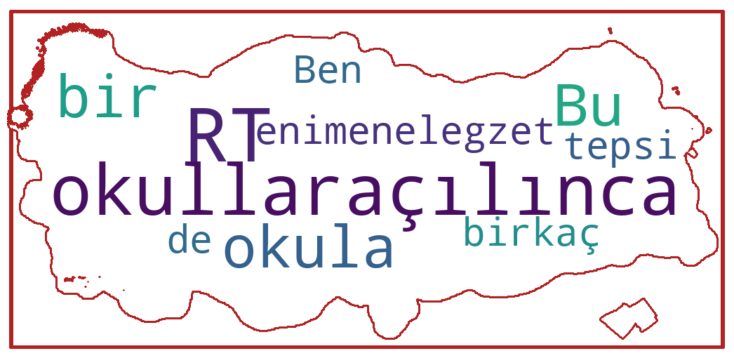

In [19]:
resimharitası("trr.png",os.getcwd(),"326",text)

In [11]:
os.getcwd()

'/Users/sahinbolukbasi/MachineLearing'

In [21]:
df=pd.read_csv("/Users/sahinbolukbasi/data.csv")

In [22]:
df.head()

,Unnamed: 0,text,polarity
0,0,RT @enimenelegzet: Ben de birkaç tepsi baklava...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1,Bugun okula gitmek istemiyorum ANNE 😂😂 #okull...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,RT @Piktesicin: #okullaraçılınca öğrencileriml...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,3,RT @kayaemrah49: Bu nasıl bir durumdur bilemiy...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,4,Sabahları uyanmak istemeyip derse gitmemeyi bi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
